In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# Load the dataset
df = pd.read_excel('ecommerce_churn[1].xlsx')

# Create a copy
df_clean = df.copy()

# Convert 'Yes'/'No' columns to 1/0
df_clean['HasSupportTicket'] = df_clean['HasSupportTicket'].map({'Yes': 1, 'No': 0})
df_clean['Churned'] = df_clean['Churned'].map({'Yes': 1, 'No': 0})

# Drop the UserID
df_clean = df_clean.drop('UserID', axis=1)

print("Data loaded and cleaned. Here's a preview:")
print(df_clean.head())

Data loaded and cleaned. Here's a preview:
   VisitsLast30Days  TimeOnSite  PurchaseCount  HasSupportTicket  Churned
0                41         7.2              0                 0        1
1                34        15.2              8                 0        0
2                 6        13.3              5                 0        1
3                15        17.1              6                 1        1
4                25        13.5              9                 1        0


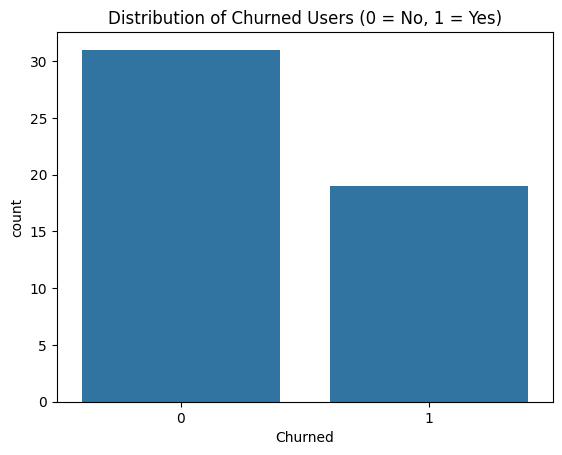

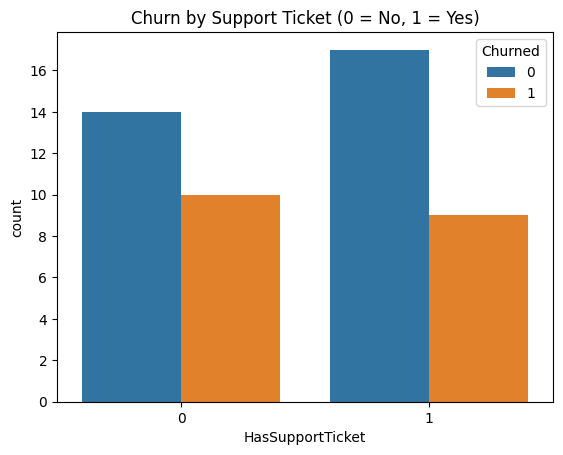

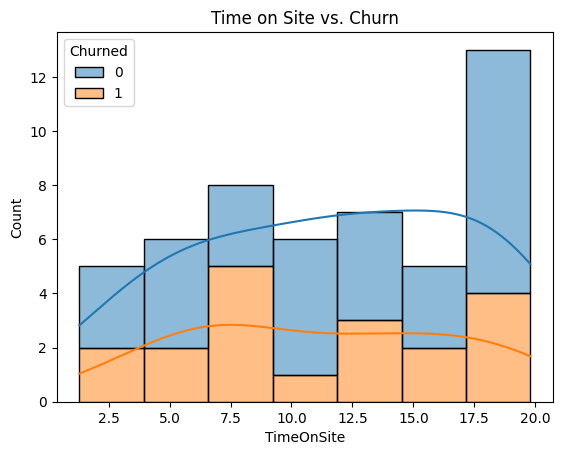

In [5]:
# How many users churned?
sns.countplot(x='Churned', data=df_clean)
plt.title('Distribution of Churned Users (0 = No, 1 = Yes)')
plt.show()

# Churn by Support Ticket Status
sns.countplot(x='HasSupportTicket', hue='Churned', data=df_clean)
plt.title('Churn by Support Ticket (0 = No, 1 = Yes)')
plt.show()

# Time on Site vs. Churn
sns.histplot(data=df_clean, x='TimeOnSite', hue='Churned', kde=True, multiple="stack")
plt.title('Time on Site vs. Churn')
plt.show()

### Guiding Questions for Analysis

1.  What is the overall churn rate in the dataset?
2.  Which features are most strongly correlated with a user churning?
3.  Do users who file support tickets churn more or less often?
4.  Is there a "danger zone" for `TimeOnSite`?
5.  Does the number of purchases affect the likelihood of churn?
6.  Based on the model, what is the profile of a user most likely to churn?

In [7]:
# 1. Define features (X) and target (y)
X = df_clean.drop('Churned', axis=1)
y = df_clean['Churned']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define features for scaling
numeric_features = ['VisitsLast30Days', 'TimeOnSite', 'PurchaseCount', 'HasSupportTicket']

# 4. Create a processing and model pipeline
# We will scale all features
model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# 5. Train the model
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate with Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Get a detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churned (0)', 'Churned (1)']))

Model Accuracy: 0.4000

Classification Report:
                 precision    recall  f1-score   support

Not Churned (0)       0.40      1.00      0.57         4
    Churned (1)       0.00      0.00      0.00         6

       accuracy                           0.40        10
      macro avg       0.20      0.50      0.29        10
   weighted avg       0.16      0.40      0.23        10



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
